# <span style="color:Green">Importing the libraries </span>

In [53]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# <span style="color: blue">Creating Link </span>
 We are using Google to generate the link because it will generate the link for Wikipedia even if we misspell the topic or person's name

In [54]:
inp = input("Enter topic name : ") 
link = 'https://www.google.com/search?q=' + str(inp) + " "+ "wikipedia"
link = link.replace(' ','+')

Enter topic name : Bhagavad Gita


In [55]:
res = requests.get(link)
soup = BeautifulSoup(res.text, 'html.parser')

#  <span style="color:orange"> Printing this soup we will scrape html data from the Google search </span>

<!DOCTYPE html>
<html lang="en-IN"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>Bhagavad Gita wikipedia - Google Search</title><script nonce="VjaZ15jZiHaUdYgknPciiA">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=
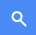
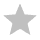
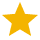
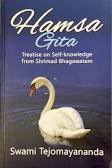

In [56]:
print(soup)

# <span style = 'color: orange'> To get the link of the Wikipedia page we will use : </span>

In [57]:
for sp in soup.find_all('div'):
    try :
        link = sp.find('a').get ('href')
        if ('en.wikipedia.org' in link):
            break
    except:
            pass        

In [58]:
link

'/url?q=https://en.wikipedia.org/wiki/Bhagavad_Gita&sa=U&ved=2ahUKEwjEp6GanZSFAxWNb2wGHdcEA2cQFnoECAEQAg&usg=AOvVaw18oN0iMD_VgMGsbZ1Gausf'

### Explaination for above :
     soup.find_all(‘div’) : We found all the div tags present in the Google page. After that we found those tags that contain 'anchor' tags and extracted 'href' from links.
Also it is not necessary that the first div tag which contains an anchor tag corresponds to the Wikipedia page.
Hence for solving this , we used an if condition which checks that the link must contain 'en.wikipedia.org'.
Break is used in order to stop iterating forward and update the link with the first link found

### This first link will be the link to the wikipedia page and will look something like this:

'/url?q=https://en.wikipedia.org/wiki/Bhagavad_Gita&sa=U&ved=2ahUKEwiP_tr-iZSFAxXCqZUCHQVoAiQQFnoECAkQAg&usg=AOvVaw04jgQOfmt31ZWpjSjX-QQ7'


The useful part of the link starts from https and ennds at 'Bhagavad_Gita' so we will remove the first 7 characters and split the link at '&'. 

## So we will update the link as

In [59]:
link = (link[7:]).split('&')[0] 

In [60]:
link

'https://en.wikipedia.org/wiki/Bhagavad_Gita'

### <span style = 'color:green'> To scrape the paragraph Updating our res variable ans send a new request to the wikipedia page and make a soup out of it.</span>

In [61]:
res = requests.get(link)
soup = BeautifulSoup(res.text, 'html.parser')

In [62]:
print(soup)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Bhagavad Gita - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vecto

# <span style = 'color: purple;font-weight:bolder'> To scrape the paragraph </span>

In [63]:
paragraphs = ' '

for p in soup.find_all('p'):
    
    paragraphs += p.text
    
    paragraphs += '\n'
    
paragraphs = paragraphs.strip()

In [65]:
fd = open('MyFile' + ".txt", 'w', encoding= 'utf-8')
fd.write(paragraphs)
fd.close()

In [66]:
# Open the text file in read mode
with open('MyFile.txt', 'r', encoding='utf-8') as file:
    # Read the contents of the file
    file_contents = file.read()

# Print the contents of the file
print(file_contents)

The Bhagavad Gita (/ˌbʌɡəvəd ˈɡiːtɑː/; Sanskrit: भगवद्गीता, lit. '"God's Song"', IAST: bhagavad-gītā[a]), often referred to as the Gita (IAST: gītā), is a 700-verse Hindu scripture, which is part of the epic Mahabharata. It forms the chapters 23–40 of book 6 of the Mahabharata called the Bhishma Parva. The work is dated to the second half of the first millennium BCE.[2]

The Bhagavad Gita is set in a narrative framework of dialogue between the Pandava prince Arjuna and his charioteer guide Krishna, an avatar of Vishnu. At the start of the Kurukshetra War between the Pandavas and the Kauravas, Arjuna despairs thinking about the violence and death the war will cause in the battle against his kin and becomes emotionally preoccupied with a dilemma.[3] Wondering if he should renounce the war, Arjuna seeks the counsel of Krishna, whose answers and discourse constitute the Bhagavad Gita. Krishna counsels Arjuna to "fulfil his Kshatriya (warrior) duty" for the upholding of dharma.[4] The Krish

# <span style = 'color: blue;font-weight:bolder'> Completed! </span> 